**CONNECTTEL CUSTOMER CHURN PREDICTION PROJECT USING MACHINE LEARNING**

 **Data dictionary**

1. CustomerID:A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender:The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.
3. SeniorCitizen:A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.
4. Partner:Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents:Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.
6. Tenure:The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.
7. PhoneService:Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.

8. MultipleLines:Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.
9. InternetService:Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.
10. OnlineSecurity:Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.
11. OnlineBackup:Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.
12. DeviceProtection:Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.
13. TechSupport:Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.
14. StreamingTV:Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
15. StreamingMovies:Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.
16. Contract:Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.
17. PaperlessBilling:Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.
18. PaymentMethod:Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.
19. MonthlyCharges:The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.
20. TotalCharges:The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.
21. Churn:The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from collections import Counter


In [121]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Data Scientist\Capstone project\Customer-Churn - Copy.csv")

In [122]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
data.tail()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [124]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [126]:
data.describe(include=["object", "bool"])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Observations
Majority of the customer are Males. Most of the customers have no dependants and partners. We can see also that most of the customer subsribe to Phone services, fibre optic internet service. They have no online security, online backup and device protection. Majority do not have multiple lines. Mahjority do not subscribe to tech support and StreamingMovies. Majority prefer month- month contract. More preference for paperless billing . Electronic check is the most preferred payment method out of the 4 options.

In [127]:
null_vals = data.isnull().sum()

In [128]:
null_vals

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

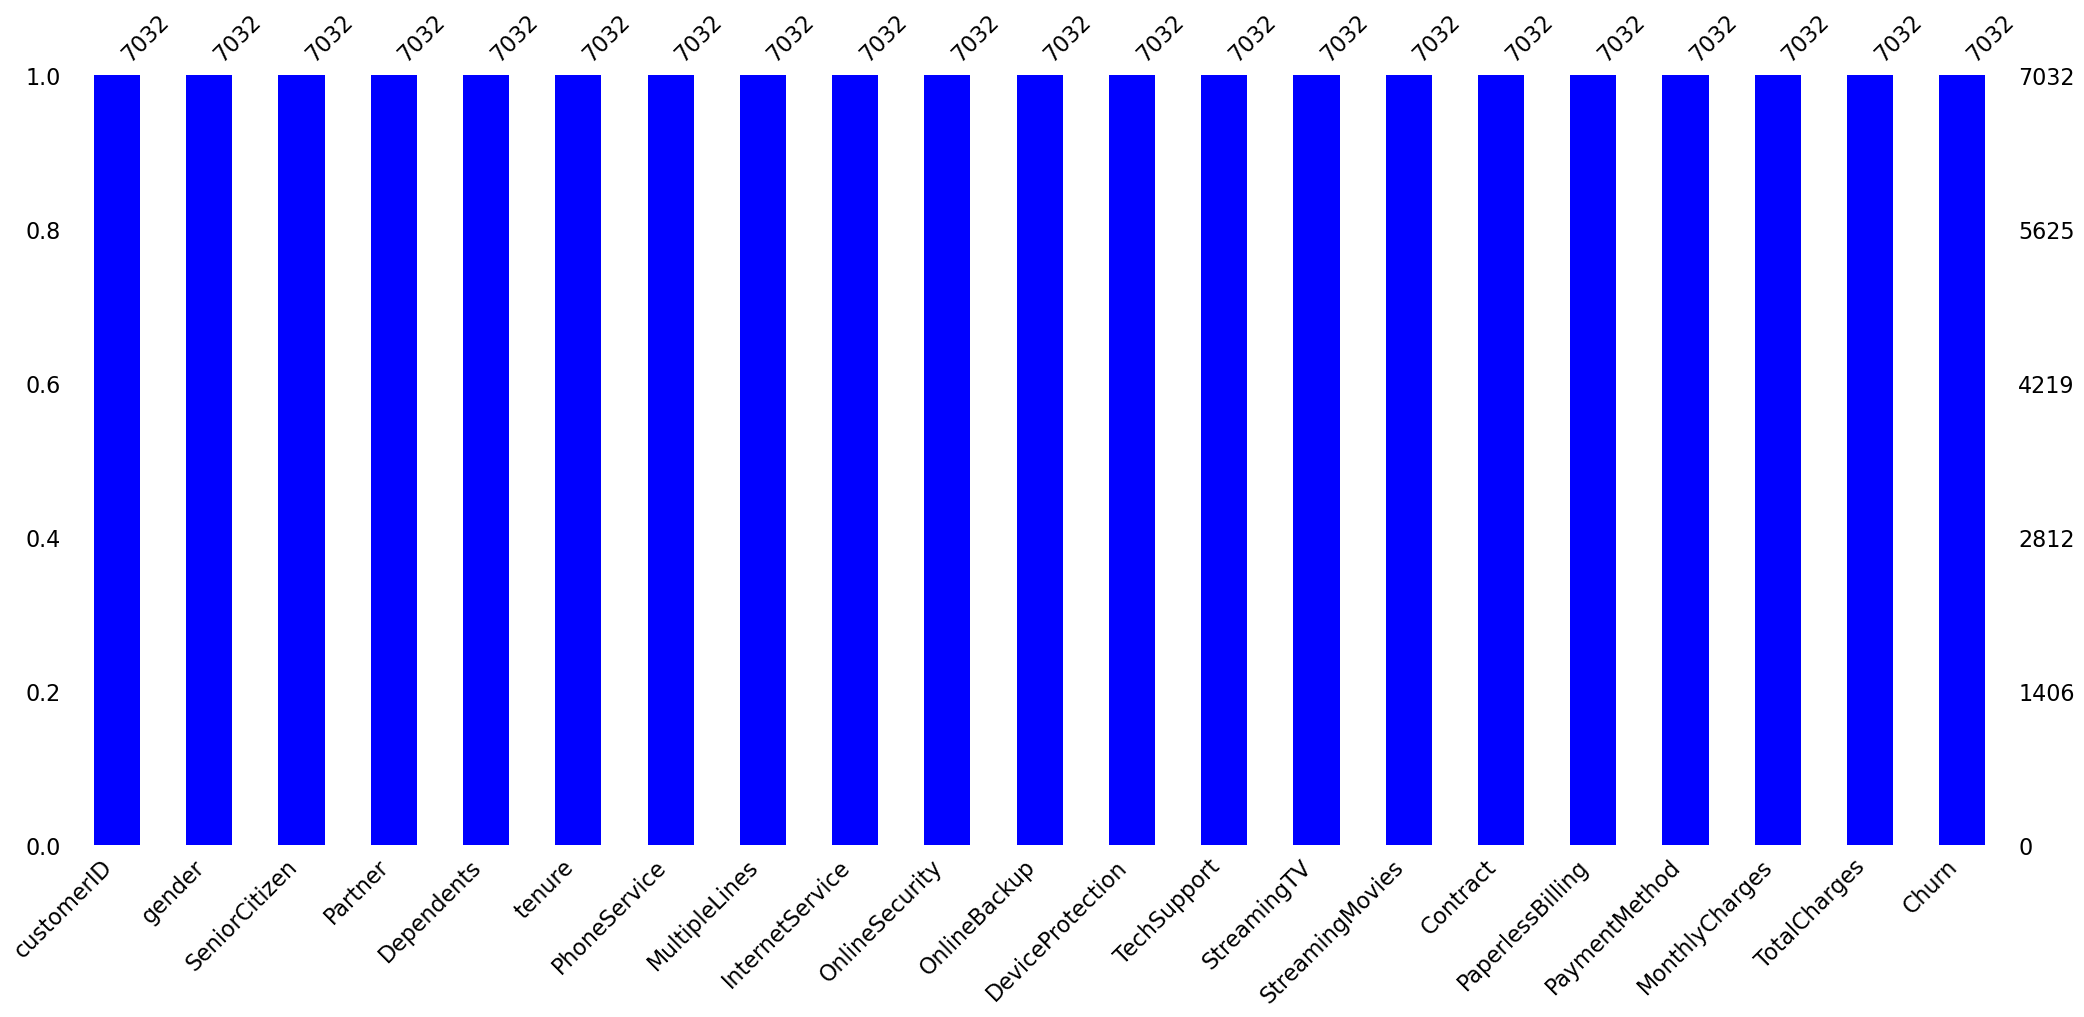

In [129]:
msno.bar(data, color="blue");

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


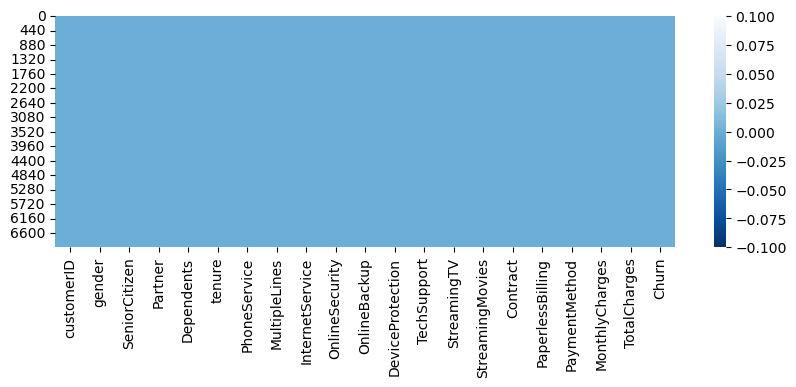

In [131]:
print(data.isnull().sum())


plt.figure(figsize= (10,3))
sns.heatmap(data.isnull(), cbar=True ,cmap = "Blues_r");

In [132]:
cat_data = data[["gender", "Partner", "Dependents", "PhoneService","MultipleLines", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod", "Churn"]]

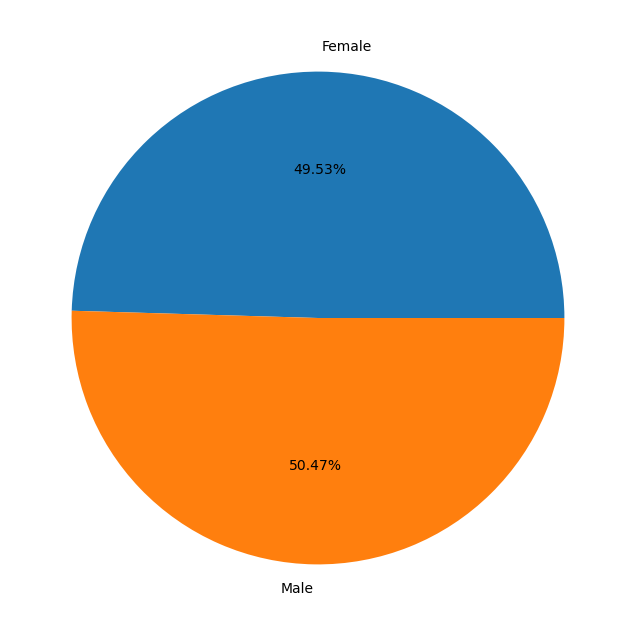

(([<matplotlib.patches.Wedge at 0x1a7f0eacd90>,
  [Text(0.016216643558604506, 1.0998804573551133, 'Female'),
   Text(-0.01621654058036449, -1.0998804588734203, 'Male')],
  [Text(0.008845441941057002, 0.5999347949209709, '49.53%'),
   Text(-0.008845385771107902, -0.5999347957491382, '50.47%')]),
 None)

In [133]:
fig,axs = plt.subplots(figsize=(8,8))
count = Counter(cat_data["gender"]) 

axs.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%"),plt.show()

## Observation

Majority of the customers are Male. 50.47% are male while 49.53% are female

In [134]:
data["gender"].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

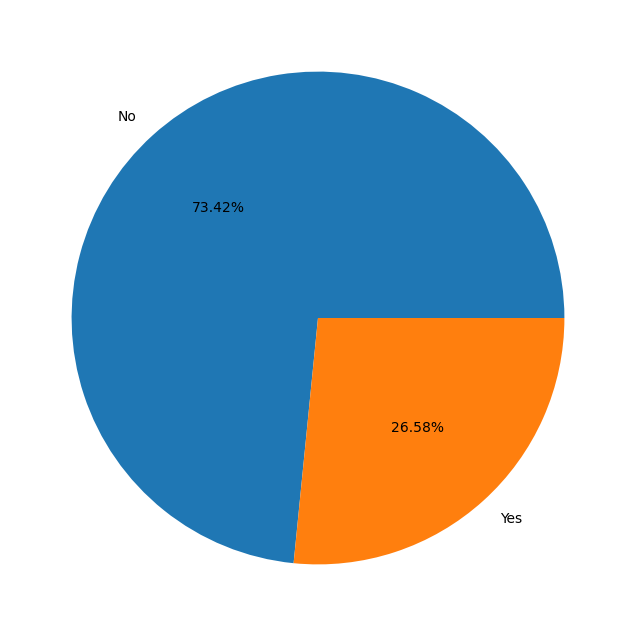

(([<matplotlib.patches.Wedge at 0x1a7f0f27bd0>,
  [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
   Text(0.7383051242403964, -0.8154174044747714, 'Yes')],
  [Text(-0.40271188594930735, 0.44477312971351146, '73.42%'),
   Text(0.40271188594930707, -0.44477312971351163, '26.58%')]),
 None)

In [135]:
fig,axs = plt.subplots(figsize=(8,8))
count = Counter(cat_data["Churn"]) 

axs.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%"),plt.show()

In [136]:
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

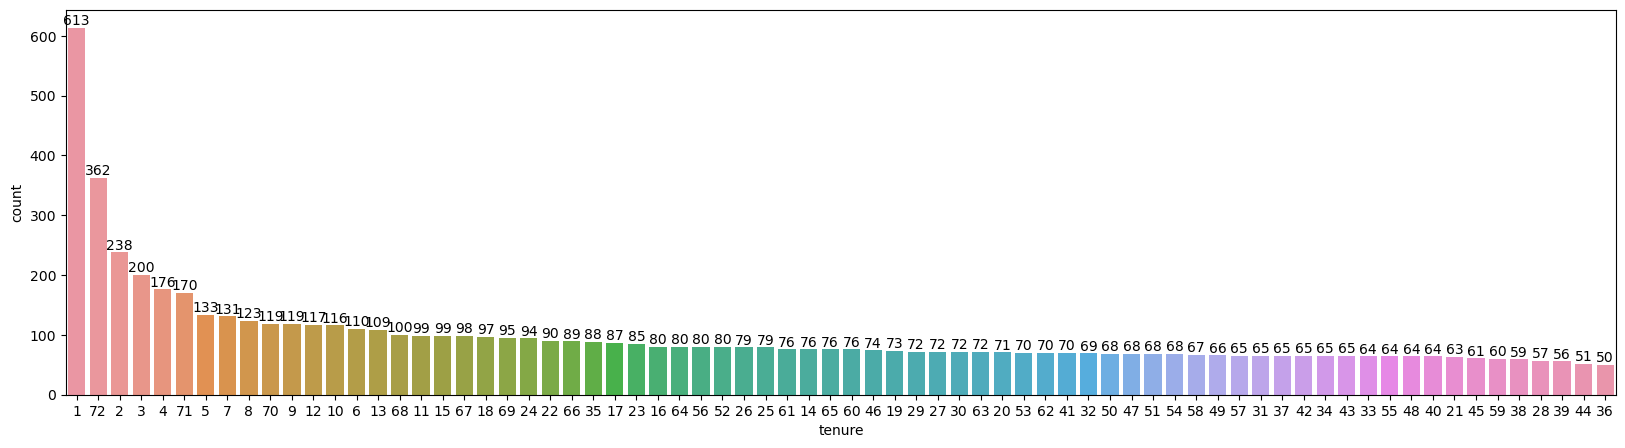

In [199]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x=data["tenure"], order = data["tenure"].value_counts(ascending=False).index)
values = data["tenure"].value_counts(ascending=False).values 
ax.bar_label(container=ax.containers[0], labels=values);

## Observation
We have a large percentage of the Customer who are not moving. Only 26.58% of the total customers are churning. Majority of the customer leaving are the very new customers. Customer with tenure of 1 day are the highest. 30% of the customer leaving only have one day tenure

In [137]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

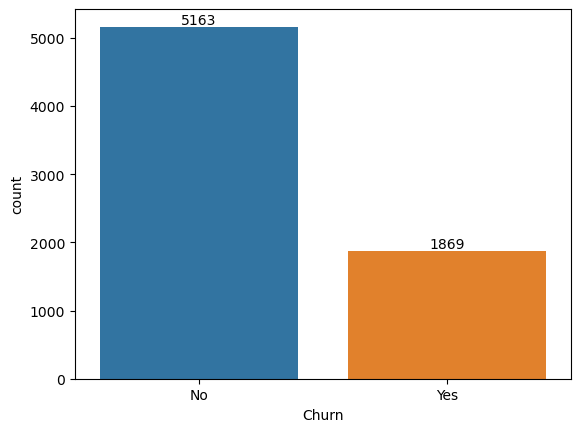

In [138]:
ax = sns.countplot(x=data["Churn"], order = data["Churn"].value_counts(ascending=False).index)
values = data["Churn"].value_counts(ascending=False).values 
ax.bar_label(container=ax.containers[0], labels=values);

In [139]:
data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

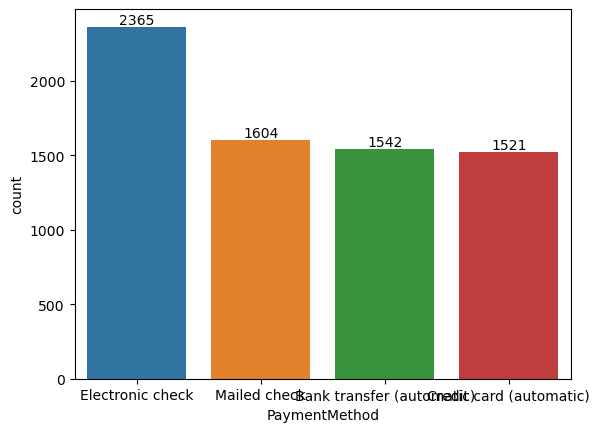

In [140]:
ax = sns.countplot(x=data["PaymentMethod"], order = data["PaymentMethod"].value_counts(ascending=False).index)
values = data["PaymentMethod"].value_counts(ascending=False).values 
ax.bar_label(container=ax.containers[0], labels=values);

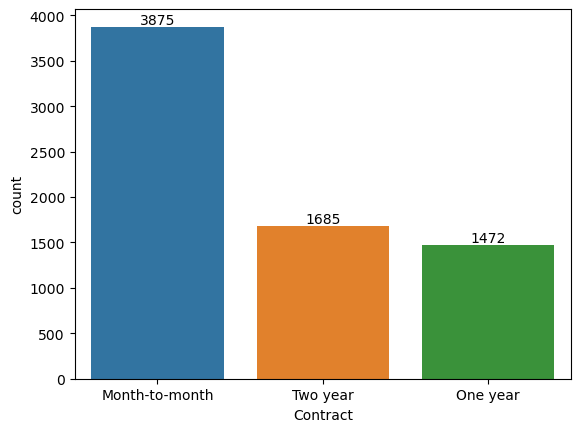

In [141]:
ax = sns.countplot(x=data["Contract"], order = data["Contract"].value_counts(ascending=False).index)
values = data["Contract"].value_counts(ascending=False).values 
ax.bar_label(container=ax.containers[0], labels=values);

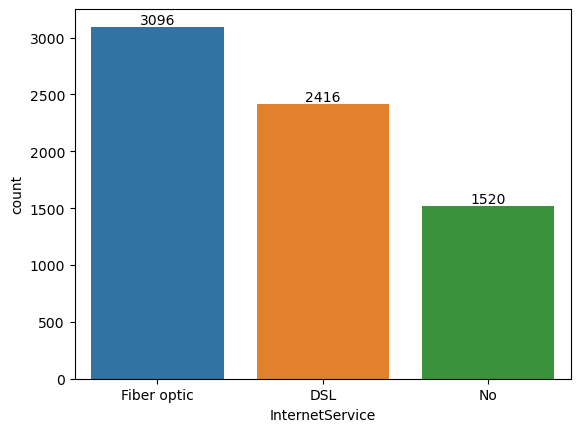

In [142]:
ax = sns.countplot(x=data["InternetService"], order = data["InternetService"].value_counts(ascending=False).index)
values = data["InternetService"].value_counts(ascending=False).values 
ax.bar_label(container=ax.containers[0], labels=values);

In [143]:
num_data = data[["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]]

In [144]:
num_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7027,0,24,84.80,1990.50
7028,0,72,103.20,7362.90
7029,0,11,29.60,346.45
7030,1,4,74.40,306.60


In [145]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [146]:
cat_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7028,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7030,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


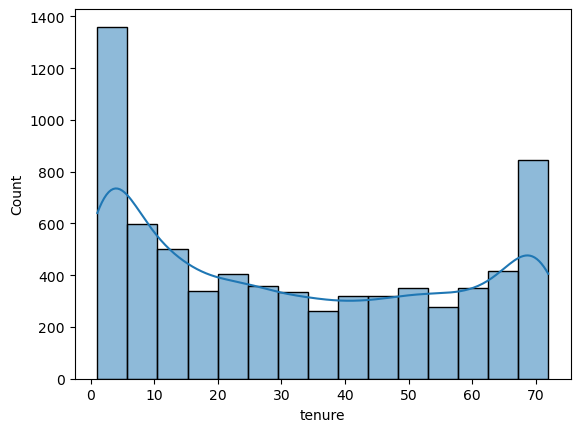

In [147]:
sns.histplot(num_data["tenure"], kde=True);

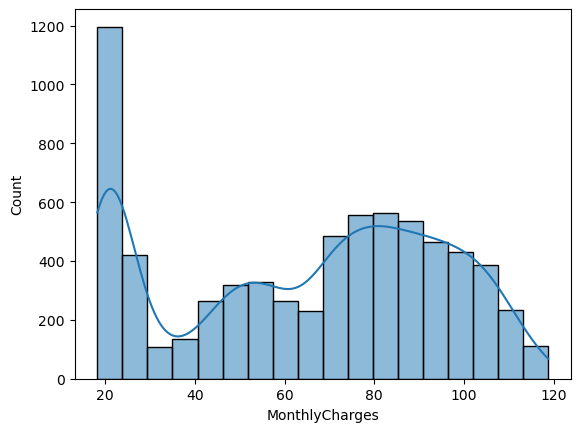

In [148]:
sns.histplot(num_data["MonthlyCharges"], kde=True);

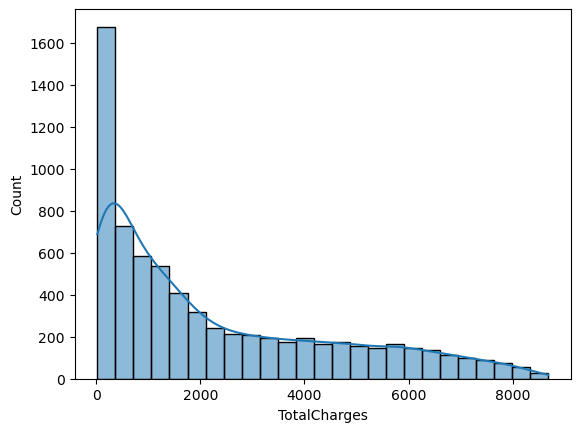

In [149]:
sns.histplot(num_data["TotalCharges"], kde=True);

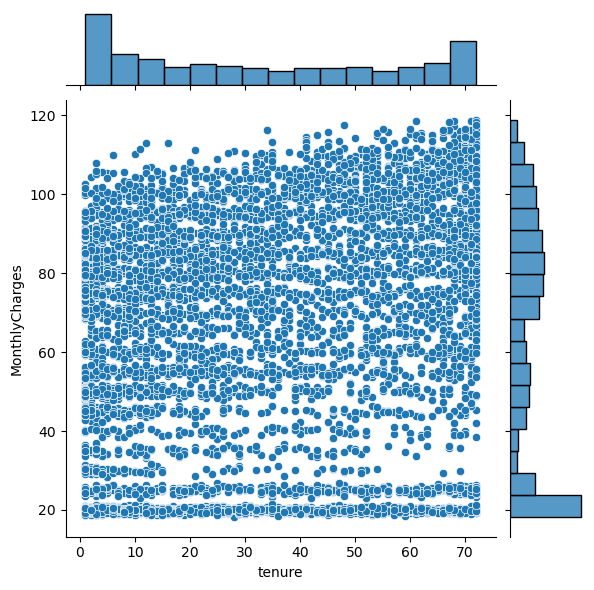

In [150]:
#Relationship btw tenure and Monthlycharge
sns.jointplot(x="tenure", y="MonthlyCharges", data=num_data);

<Figure size 600x400 with 0 Axes>

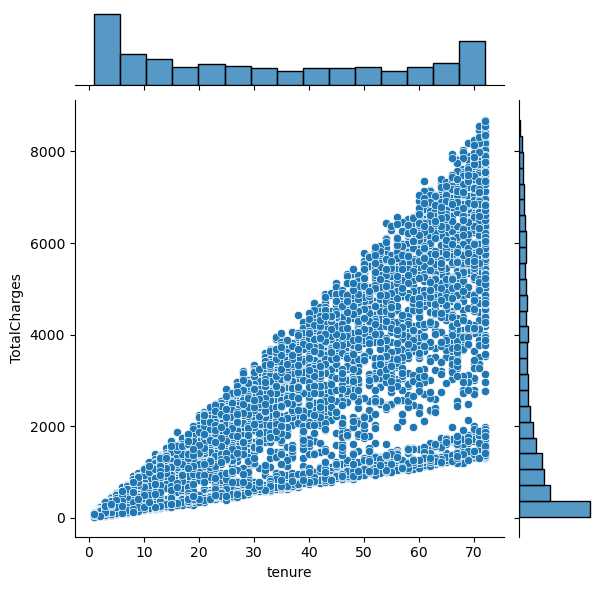

In [203]:

#Relationship btw Tenure and Seniorcitizen
sns.jointplot(x="tenure", y="TotalCharges", data=num_data);

Text(0.5, 1.0, 'Boxplot on Senior Citizen')

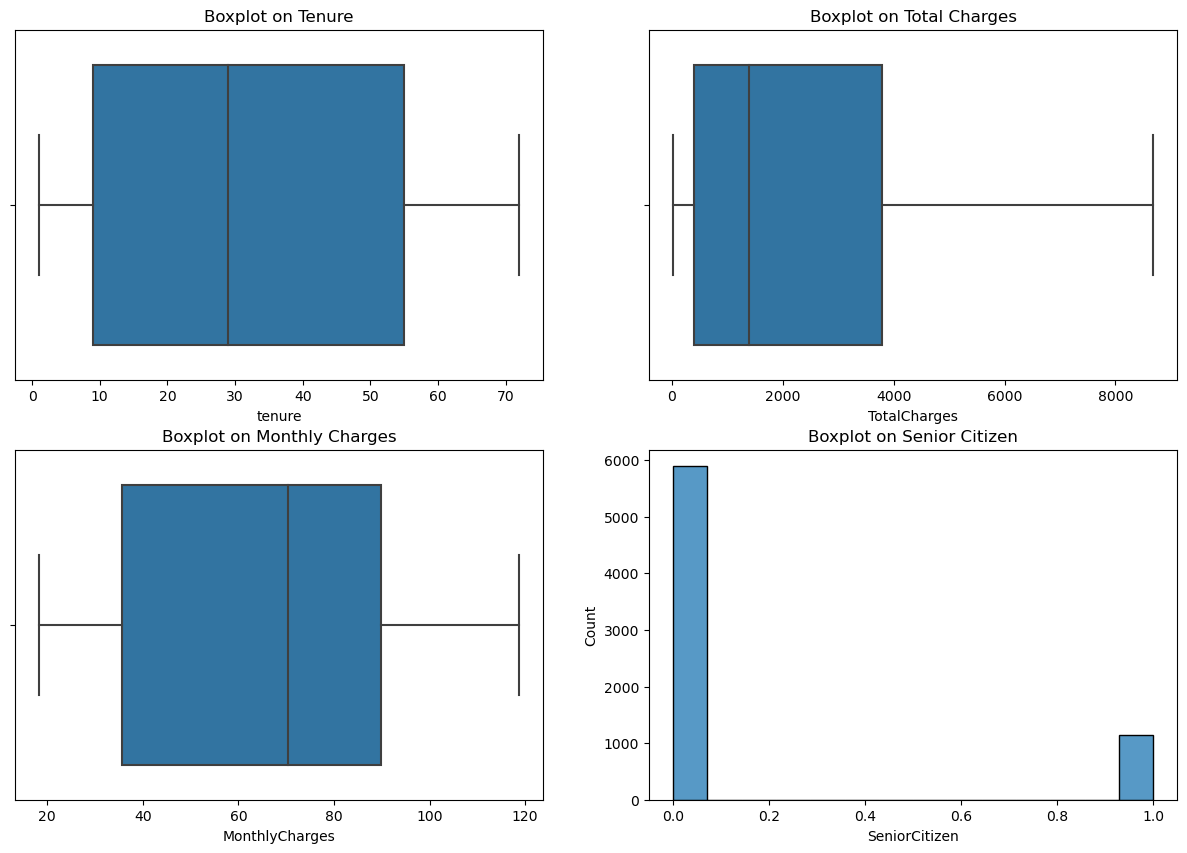

In [152]:
# Tenure, Seniorcitizen , Montlhycharge and Totalcharges - Subplot

fig,axs = plt.subplots(nrows= 2, ncols =2, figsize=(15,10) )

sns.boxplot(x="tenure", data=num_data, ax=axs[0,0])
axs[0,0]. set_title("Boxplot on Tenure")


sns.boxplot(x="TotalCharges", data=num_data, ax=axs[0,1])
axs[0,1]. set_title("Boxplot on Total Charges")

sns.boxplot(x="MonthlyCharges", data=num_data, ax=axs[1,0])
axs[1,0]. set_title("Boxplot on Monthly Charges")

sns.histplot(x="SeniorCitizen", data=num_data, ax=axs[1,1])
axs[1,1]. set_title("Boxplot on Senior Citizen")

Text(0.5, 1.0, 'Total number of Customer')

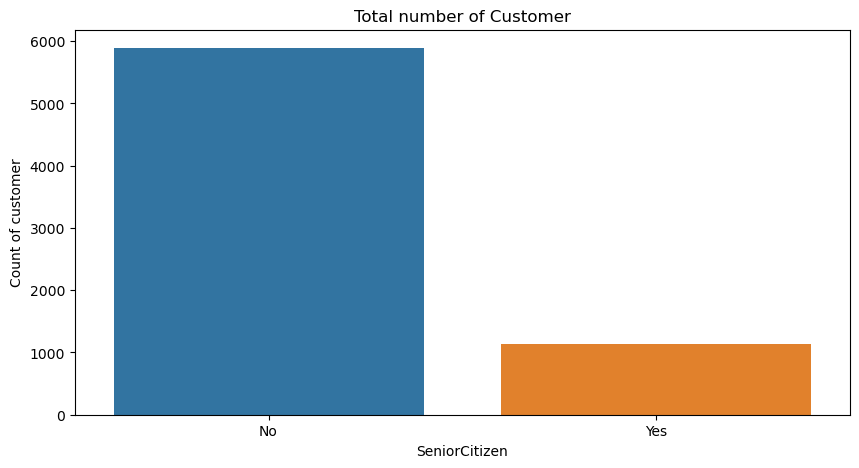

In [153]:
## Data visualization
#Senior Citizen
def citizen(SeniorCitizen):
    if SeniorCitizen ==0:
        return "No"
    else:
        return "Yes"
    
data["SeniorCitizen"] = data["SeniorCitizen"].apply(citizen)

#Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot (x = "SeniorCitizen" , data =data)
plt.xlabel("SeniorCitizen")
plt.ylabel("Count of customer")
plt.title("Total number of Customer")

Text(0.5, 1.0, 'Total number of Customer')

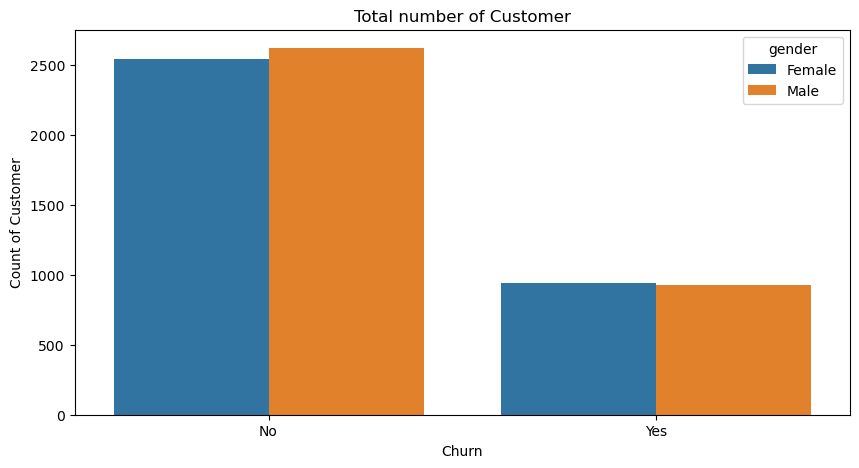

In [154]:
#Investigating the gender of customers by the Churn feature
plt.figure(figsize = (10, 5))
sns.countplot(x="Churn" , data=data , hue="gender")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation 
The number of female who have churned is slighly higher than male. While Male with no Churn is slightly higher than Female. 

Text(0.5, 1.0, 'Total number of Customer')

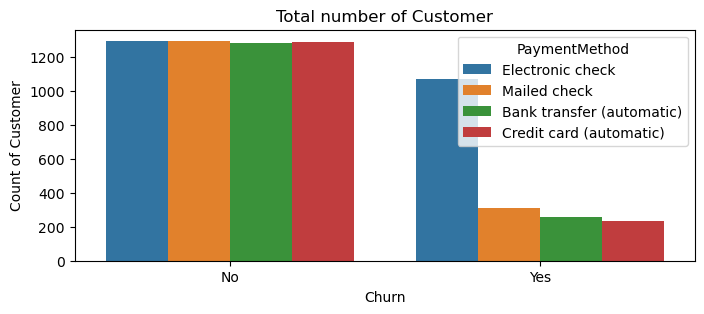

In [205]:
#Investigating the payment method of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="PaymentMethod")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

##  Observation

High number of customer of customer that churned were using the electronic check payment method

Text(0.5, 1.0, 'Total number of Customer')

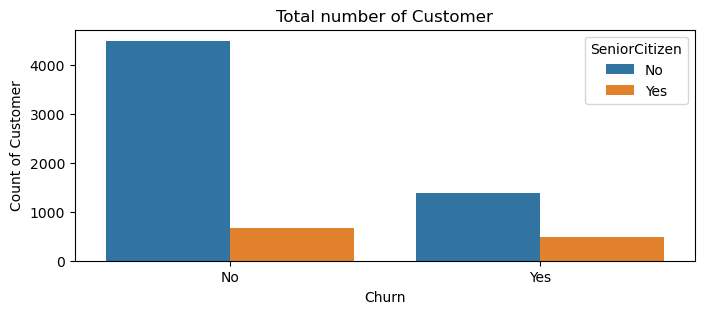

In [206]:
#Investigating the Senior Citizen class of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="SeniorCitizen")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation
Majority of the customers are not senior citizen. More of the senior citizen are not churning.

Text(0.5, 1.0, 'Total number of Customer')

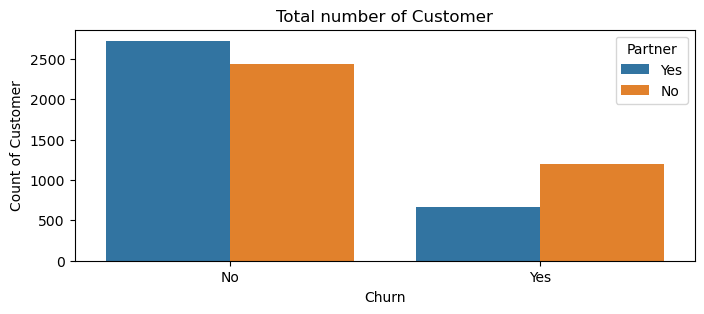

In [207]:
#Investigating Partner of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="Partner")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation
Majority of customers with no partners are churning

Text(0.5, 1.0, 'Total number of Customer')

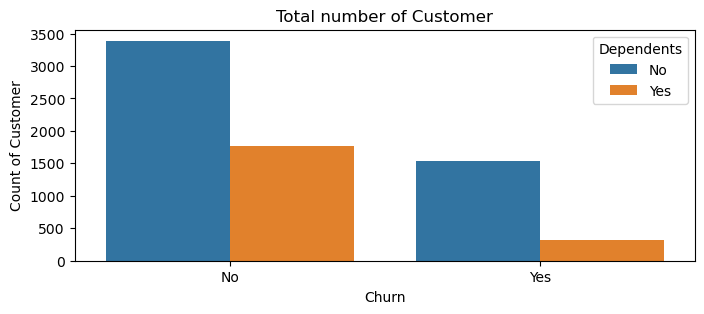

In [208]:
#Investigating Dependents of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="Dependents")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observbation
Out the customers churning, majority have no dependent.

Text(0.5, 1.0, 'Total number of Customer')

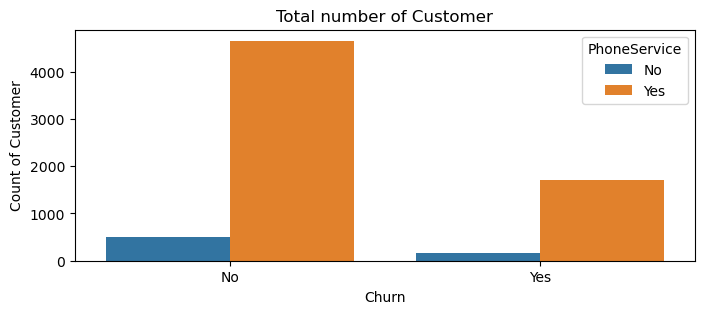

In [209]:
#Investigating PhoneService of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="PhoneService")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation
Majority of the customer churning requested for Phone service

Text(0.5, 1.0, 'Total number of Customer')

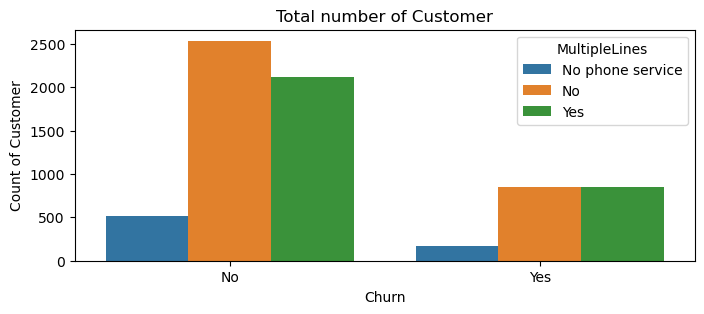

In [210]:
#Investigating MultipleLines of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="MultipleLines")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

###  Observation
No difference in customer with multiple lines and not when it comes to churning. This is not a factor.

Text(0.5, 1.0, 'Total number of Customer')

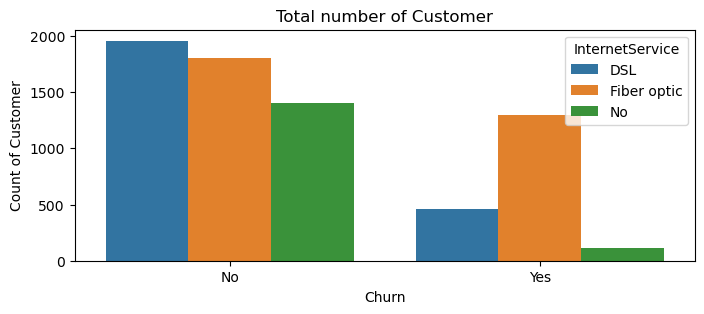

In [211]:
#Investigating InternetService of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="InternetService")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observations
Majority of the customers leaving requested for Fibre optic option of internet service.

Text(0.5, 1.0, 'Total number of Customer')

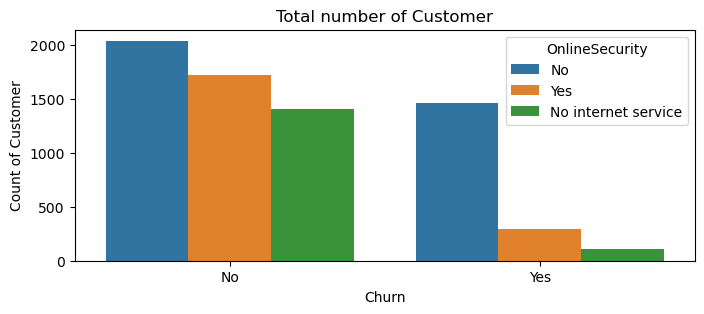

In [212]:
#Investigating OnlineSecurity of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="OnlineSecurity")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observations
Majority of the customers leaving did not request for online security.

Text(0.5, 1.0, 'Total number of Customer')

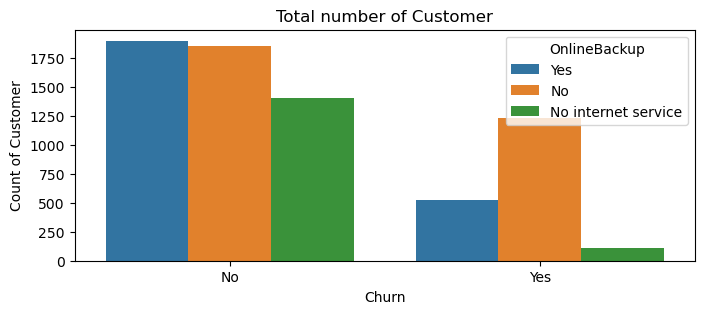

In [213]:
#Investigating OnlineBackup of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="OnlineBackup")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation

Majority of the customer leaving did not rrequest for OnlineBackup

Text(0.5, 1.0, 'Total number of Customer')

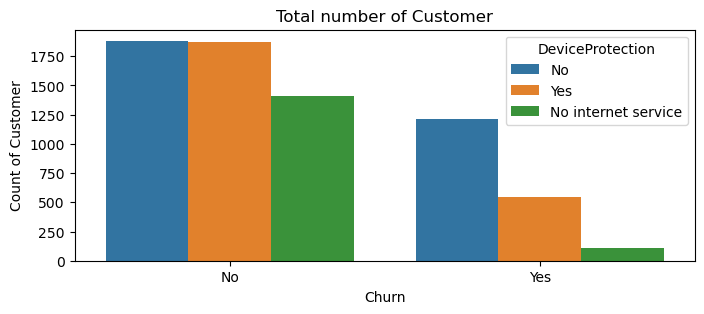

In [214]:
#Investigating DeviceProtection of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="DeviceProtection")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation

MAjority of customers leaving did not request for Device Protection

Text(0.5, 1.0, 'Total number of Customer')

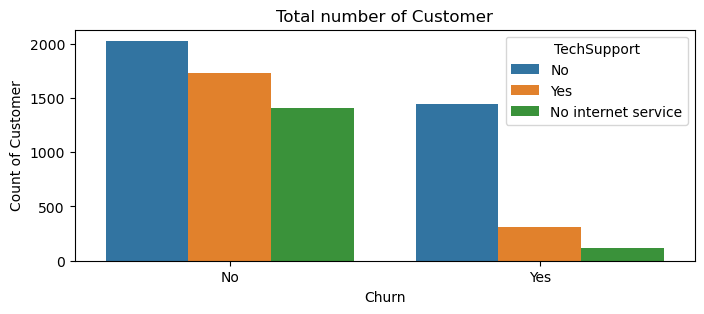

In [215]:
#Investigating TechSupport of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="TechSupport")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation
Majority of the customers leaving did not request for Tech Support

Text(0.5, 1.0, 'Total number of Customer')

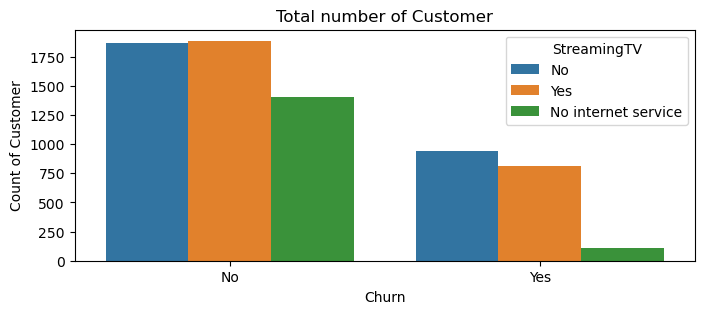

In [216]:
#Investigating StreamingTV of customers by the Churn feature
plt.figure(figsize = (8, 3))
sns.countplot(x="Churn" , data=data , hue="StreamingTV")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation
Majority of customer leaving did not request for StreamingTV

Text(0.5, 1.0, 'Total number of Customer')

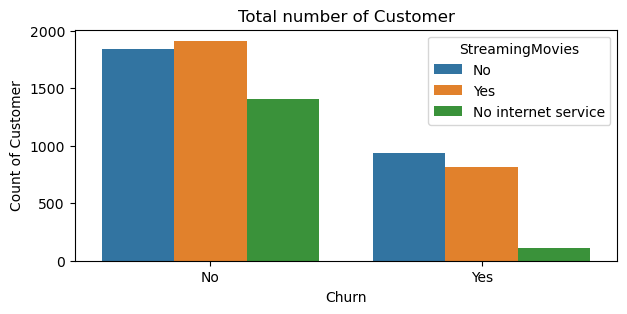

In [217]:
#Investigating StreamingMovies of customers by the Churn feature
plt.figure(figsize = (7, 3))
sns.countplot(x="Churn" , data=data , hue="StreamingMovies")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation

Majority of customer leaving did not request for StreamingMovies

Text(0.5, 1.0, 'Total number of Customer')

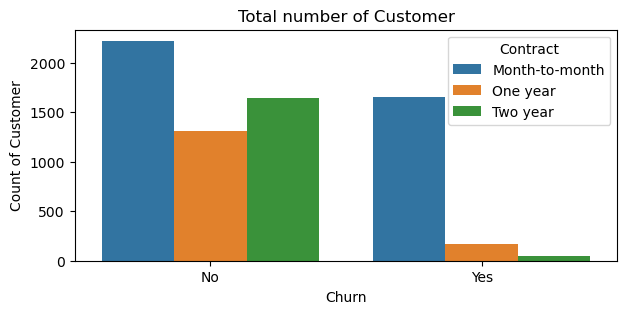

In [218]:
#Investigating Contract of customers by the Churn feature
plt.figure(figsize = (7, 3))
sns.countplot(x="Churn" , data=data , hue="Contract")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## observation
Majority of customer leaving were on Month to Month contract

Text(0.5, 1.0, 'Total number of Customer')

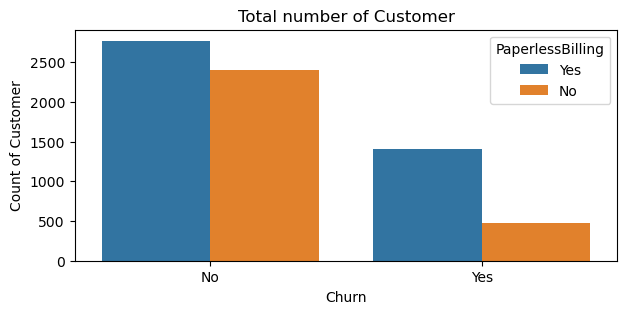

In [219]:
#Investigating PaperlessBilling of customers by the Churn feature
plt.figure(figsize = (7, 3))
sns.countplot(x="Churn" , data=data , hue="PaperlessBilling")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

## Observation

Majority of customer leaving used the paperless billing . This also applies to customer who not leaving.

Text(0.5, 1.0, 'Total number of Customer')

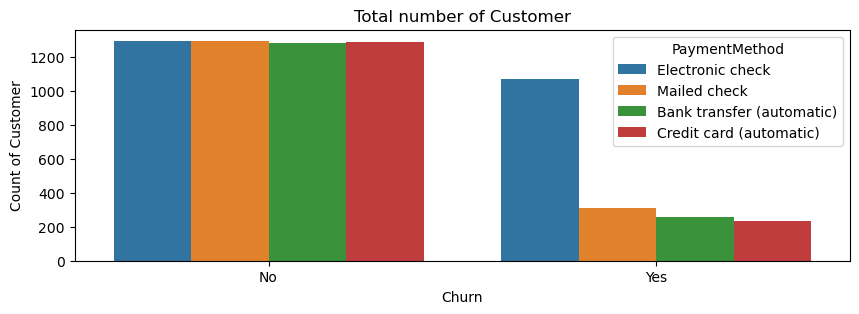

In [223]:
#Investigating PaymentMethod of customers by the Churn feature
plt.figure(figsize = (10, 3))
sns.countplot(x="Churn" , data=data , hue="PaymentMethod")
plt.xlabel("Churn")
plt.ylabel("Count of Customer")
plt.title("Total number of Customer")

### Observation

Majority of customer leaving are using Electronic check of payment method.

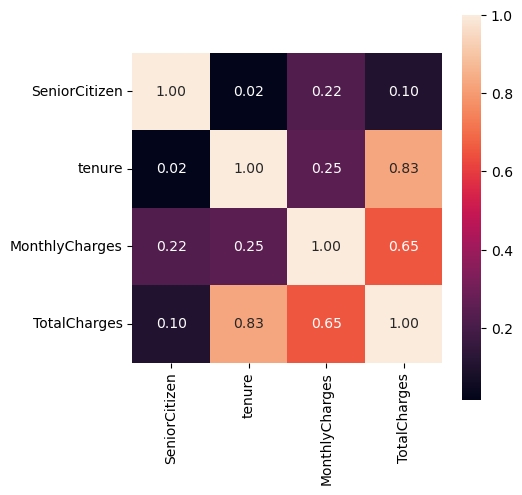

In [224]:
#Correlation between TotalCharges and other variables in the dataset
plt.figure(figsize = (5,5))

hm = sns.heatmap(num_data.corr(), cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10})

##  observation
There is positive correction between Tenure , Monthly Charges and TotalCharges.

Text(0.5, 1.0, 'Total number of Customer')

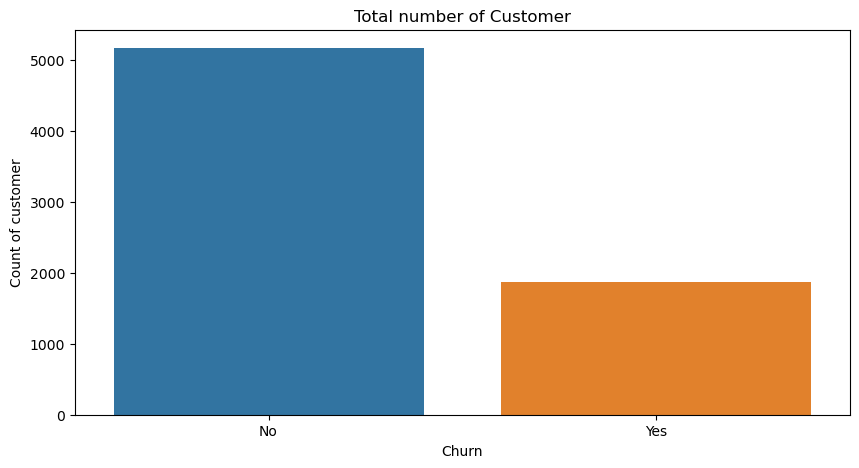

In [172]:
## Data visualization
#Churn

#Investigating the churn of customer
plt.figure(figsize = (10,5))
sns.countplot (x = "Churn" , data =data)
plt.xlabel("Churn")
plt.ylabel("Count of customer")
plt.title("Total number of Customer")

In [173]:
num_data2 = data[["tenure", "MonthlyCharges", "TotalCharges","Churn"]]

In [174]:
num_data2

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes
...,...,...,...,...
7027,24,84.80,1990.50,No
7028,72,103.20,7362.90,No
7029,11,29.60,346.45,No
7030,4,74.40,306.60,Yes


<Axes: >

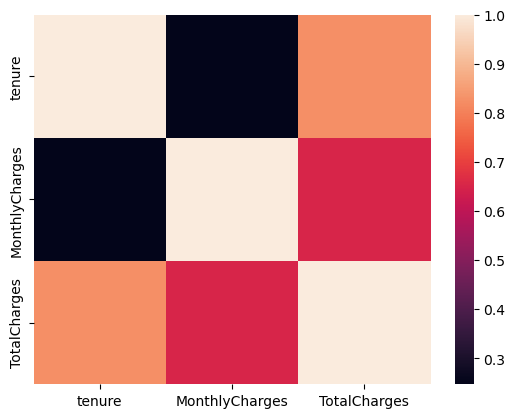

In [175]:
g = ["tenure","MonthlyCharges","TotalCharges"]
sns.heatmap(data[g].corr())

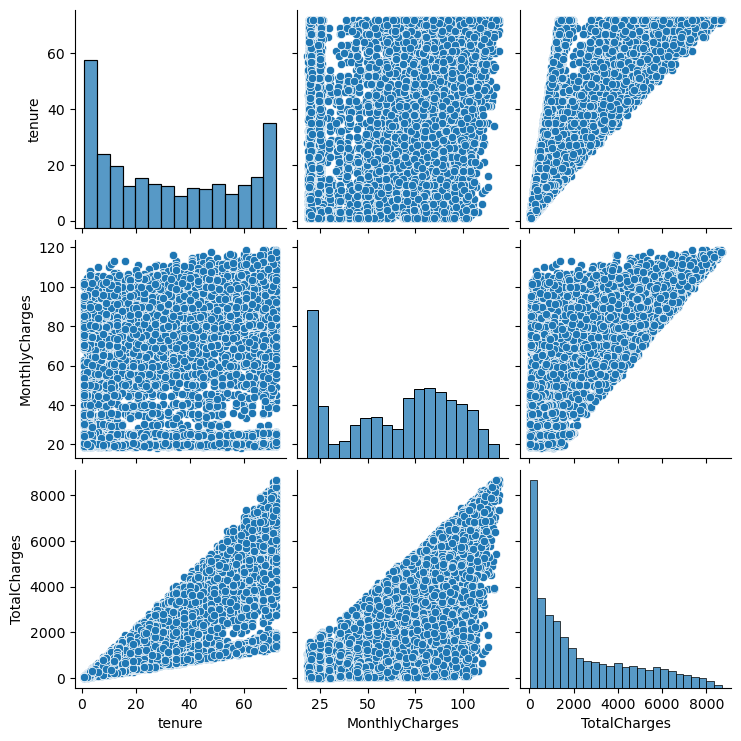

In [176]:
sns.pairplot(data);

In [177]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [178]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [179]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [180]:
#dropping off some redundant features
data.drop(['customerID',], axis= 1, inplace=True)

#creating a copy of the dataset 
data2= data.copy()

In [181]:
#encode the categorical features to numerical ones
data2= pd.get_dummies(data, drop_first=True)
data2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [182]:
bool_value = True
integer_value = bool_value  # integer_value will be 1

bool_value = False
integer_value = bool_value  # integer_value will be 0


In [183]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   gender_Male                            7032 non-null   bool   
 4   SeniorCitizen_Yes                      7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  Inte

In [184]:
# scale dataset features
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data2.drop("Churn_Yes", axis=1)  # Assuming "Churn" is the target variable
y = data2["Churn_Yes"]


In [185]:
# importing predictive regression models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 


In [187]:

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistics Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistics Regression
Accuracy: 0.7867803837953091
Precision: 0.6241610738255033
Recall: 0.49732620320855614
F1-score: 0.5535714285714286
AUC-ROC: 0.6944520657862723


Accuracy (0.7868):

This indicates your model correctly classified churn in approximately 78.7% of the instances in the testing set.
While not perfect, it suggests the model can capture some underlying patterns in the data that differentiate churning customers from non-churning ones.

Precision (0.6241):

Precision focuses on the positive predictions (classified as churn).
A value of 0.6241 means that out of all the customers the model predicted to churn, about 62.4% actually churned in the testing set.
A lower precision might indicate the model is over-predicting churn (generating false positives).

Recall (0.4973):

Recall looks at the actual churn cases (positive class).
A value of 0.4973 means that out of all the customers who actually churned in the testing set, the model identified about 49.7% of them.
A lower recall suggests the model might be missing some churning customers (false negatives).

F1-score (0.5536):
A value of 0.5536 suggests there's a trade-off between precision and recall, and the model might benefit from further tuning to improve one or both metrics.

AUC-ROC (0.6945):

AUC-ROC (Area Under the Receiver Operating Characteristic Curve) 
A value of 0.6945 indicates a somewhat better than random chance (0.5) of correctly classifying churned and non-churned customers. However, there's still room for improvement.
Overall:

The logistic regression model shows moderate performance in predicting churn.
It can identify some patterns that differentiate churners from non-churners, but there's also room for improvement.

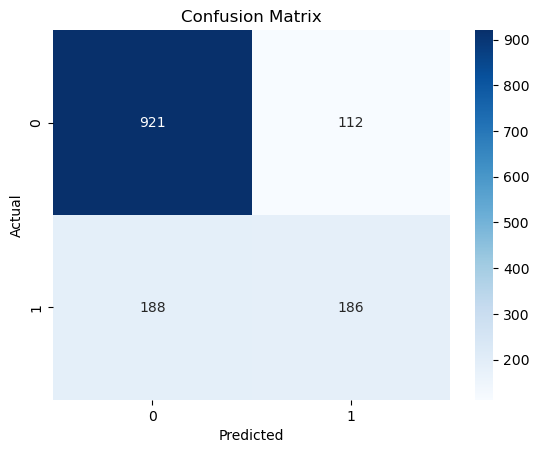

In [188]:
# create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap= "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [189]:
rcf = RandomForestClassifier()

rcf.fit(X_train, y_train)

rcf_pred = rcf.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rcf_pred))
print("Precision:", precision_score(y_test, rcf_pred))
print("Recall:", recall_score(y_test, rcf_pred))
print("F1-score:", f1_score(y_test, rcf_pred))
print("AUC-ROC:", roc_auc_score(y_test, rcf_pred))


Random Forest Classifier
Accuracy: 0.7846481876332623
Precision: 0.6290909090909091
Recall: 0.4625668449197861
F1-score: 0.5331278890600925
AUC-ROC: 0.6819126576970663


Accuracy (0.7861):
This indicates that the model correctly classified approximately 78.6% of the instances in the testing set.


Precision (0.6299):
A value of 0.6299 means that out of all the customers the model predicted to churn, about 63% actually churned in the testing set.

Recall (0.4733):
A value of 0.4733 means that out of all the customers who actually churned in the testing set, the model identified about 47.3% of them.

F1-score (0.5405):.
A value of 0.5405 suggests there's a trade-off between precision and recall, and the model might benefit from further tuning to improve one or both metrics.

AUC-ROC (0.6863):
A value of 0.6863 indicates a somewhat better than random chance (0.5) of correctly classifying churned and non-churned customers. However, there's still room for improvement.
Overall:


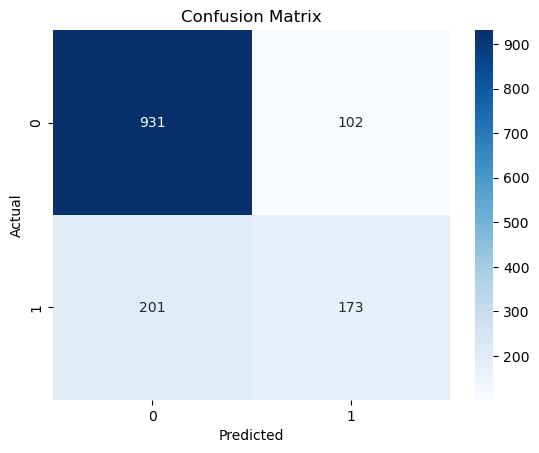

In [190]:
rcf = confusion_matrix(y_test, rcf_pred)

# visualize the confusion matrix
sns.heatmap(rcf, annot=True, cmap= "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [191]:
model = XGBClassifier(objective='binary:logistic',  
                       n_estimators=100,  
                       learning_rate=0.1,  
                       random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Gradient Boosting")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


Gradient Boosting
Accuracy: 0.7889125799573561
Precision: 0.627906976744186
Recall: 0.5053475935828877
F1-score: 0.56
AUC-ROC: 0.6984627609734381


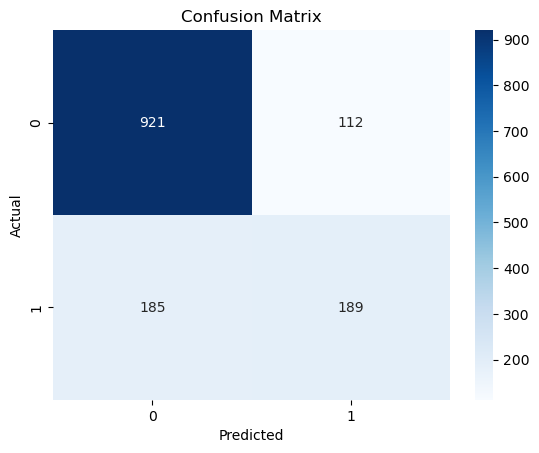

In [192]:
# create a confusion matrix
gb = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(gb, annot=True, cmap= "Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy (0.7889):

This indicates that the model correctly classified approximately 78.9% of the instances in the testing set.
This is slightly better than the Random Forest model (0.7861), suggesting Gradient Boosting might have captured some additional patterns in the data.

Precision (0.6279):
A value of 0.6279 means that out of all the customers the model predicted to churn, about 62.8% actually churned in the testing set.
A similar precision value to the Random Forest model suggests both models might be over-predicting churn (generating false positives).

Recall (0.5053):
A value of 0.5053 indicates that out of all the customers who actually churned in the testing set, the model identified about 50.5% of them.
This is a slight improvement over the Random Forest model's recall (0.4733), suggesting Gradient Boosting might be better at capturing some churning customers that the Random Forest model missed.

F1-score (0.56):
 A value of 0.56 suggests there's a trade-off between precision and recall, similar to the Random Forest model (0.5405). However, the higher value here indicates a slightly better balance between the two.

AUC-ROC (0.6985):
A value of 0.6985 indicates a somewhat better than random chance (0.5) of correctly classifying churned and non-churned customers. This is a slight improvement over the Random Forest model (0.6863).



**Observations**
•	All three models achieved very similar accuracy scores, suggesting they can correctly classify a comparable portion of the data.
•	Precision and Recall values are also quite similar across the models. All three models seem to be over-predicting positive cases (generating false positives) to some extent.
•	F1-score and AUC-ROC values are also close, indicating a similar balance between precision and recall and a slightly better than random chance ability to distinguish positive and negative cases.

**Key Differences**
•	Gradient Boosting shows a slight edge in Recall compared to both Random Forest and Logistic Regression, meaning it might be better at identifying actual positive cases.
•	Logistic Regression might be slightly simpler to interpret compared to Random Forest and Gradient Boosting, which can be more complex models.

**Choosing the Best Model**

If minimizing false positives, It is crucial  that the company prioritize Logistic Regression or explore models with higher precision.
If identifying all positive cases (e.g., capturing all churning customers) is more important, Gradient Boosting might be a better choice due to its higher recall.Optimizing the Gradient Boost model can give us also a better performance.

**However, it is advisable to explore other models with higher Accuracy and Precision.**

